In [12]:
import os
import sys
import scipy.io
from scipy import ndimage, spatial
# Add the path which contains wrappers for II harwares

#sys.path.append(r'.\Hardware_src') # Make the change according to your path
import json
import pickle
# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
#from helper import check_minmax
#from IPython.display import clear_output
#from IPython.display import display, HTML
import time

In [3]:
filt_1 = np.load("full_img__filt_1_ap_1_4.npy")
filt_2 = np.load("full_img__filt_2_ap_1_4.npy")
filt_3 = np.load("full_img__filt_3_ap_1_4.npy")
filt_4 = np.load("full_img__filt_4_ap_1_4.npy")
filt_5 = np.load("full_img__filt_5_ap_1_4.npy")
filt_6 = np.load("full_img__filt_6_ap_1_4.npy")
filt_1.shape

(5, 1024, 1280)

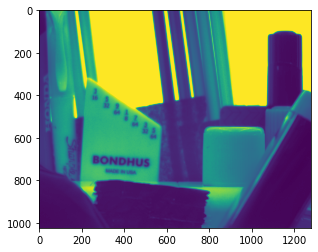

In [10]:
mean_img1 = np.mean(filt_1, axis = 0)
mean_img2 = np.mean(filt_2, axis = 0)
mean_img3 = np.mean(filt_3, axis = 0)
mean_img4 = np.mean(filt_4, axis = 0)
mean_img5 = np.mean(filt_5, axis = 0)
mean_img6 = np.mean(filt_6, axis = 0)


plt.figure()
plt.imshow(mean_img2)

In [14]:
tf = scipy.io.loadmat("transfer_functions.mat") #Taken from blackboard
tf

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb 25 14:51:59 2016',
 '__version__': '1.0',
 '__globals__': [],
 'F': array([[2.41e-08, 2.59e-08, 4.74e-08, ..., 2.31e-06, 1.91e-06, 1.74e-06],
        [2.80e-08, 5.24e-08, 1.33e-09, ..., 3.60e-07, 2.67e-07, 1.85e-07],
        [8.06e-08, 1.37e-07, 7.38e-08, ..., 4.10e-06, 3.78e-06, 3.47e-06],
        ...,
        [1.17e-06, 1.26e-06, 9.84e-07, ..., 3.68e-08, 1.80e-08, 3.41e-08],
        [7.45e-08, 5.25e-08, 7.59e-08, ..., 2.24e-09, 1.88e-08, 5.27e-08],
        [1.00e+00, 1.00e+00, 1.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00]]),
 'dl': array([[0.09259149, 0.10443501, 0.11692848, 0.13005401, 0.14379373,
         0.15812977, 0.17304426, 0.18851931, 0.20453706, 0.22107962,
         0.23812913, 0.25565246, 0.27355545, 0.29172871, 0.31006283,
         0.32844842, 0.34677606, 0.36493637, 0.38281994, 0.40031736,
         0.41731924, 0.43373436, 0.44954428, 0.46474875, 0.4793475 ,
         0.4933403 , 0.50672688, 0.51950

In [51]:
F = tf['F']
print(F.shape)
x = np.reshape(mean_img1, (1310720, 1))
print(x.shape)
dl = tf['dl']
print(dl.shape)
ds = tf['ds']
print(ds.shape)
db = tf['db1']#Check db2 also
print(db.shape)

(7, 351)
(1310720, 1)
(1, 351)
(1, 351)
(1, 351)


In [48]:
FFt = np.dot(F, np.transpose(F))
De = np.eye(7) * 0.01

In [57]:
bigd = np.divide(1, (np.multiply(db, dl, ds) + 0.01))

In [58]:
L = tf['L']
LtL = np.dot(np.transpose(L), L)